<a href="https://colab.research.google.com/github/SHaruto0/CSCI-4170-Project-in-AI-and-ML/blob/main/HW1/Haruto_Suzuki_HW1_Logistic_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Imports


In [1]:
import time
import pickle
import numpy as np
import pandas as pd
import seaborn as sns
from itertools import product
import matplotlib.pyplot as plt
from sklearn.metrics import precision_score, recall_score, f1_score
from statsmodels.stats.outliers_influence import variance_inflation_factor

#Load Uploaded Data


In [2]:
df = pd.read_excel("credit_card_data.xls")

In [3]:
# Check the first few rows
print(df.head())

   ID  LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_0  PAY_2  PAY_3  PAY_4  \
0   1      20000    2          2         1   24      2      2     -1     -1   
1   2     120000    2          2         2   26     -1      2      0      0   
2   3      90000    2          2         2   34      0      0      0      0   
3   4      50000    2          2         1   37      0      0      0      0   
4   5      50000    1          2         1   57     -1      0     -1      0   

   ...  BILL_AMT4  BILL_AMT5  BILL_AMT6  PAY_AMT1  PAY_AMT2  PAY_AMT3  \
0  ...          0          0          0         0       689         0   
1  ...       3272       3455       3261         0      1000      1000   
2  ...      14331      14948      15549      1518      1500      1000   
3  ...      28314      28959      29547      2000      2019      1200   
4  ...      20940      19146      19131      2000     36681     10000   

   PAY_AMT4  PAY_AMT5  PAY_AMT6  default payment next month  
0         0         0   

#Understand the Data

Let's check the dimention of the data. Understanding the dimention helps with matrix multiplication later on.

In [4]:
df.shape

(30000, 25)

There are no values missing. The data was either cleaned already or the institution/company that donated this dataset to UCI properly did their job recording informations.

In [5]:
df.isna().sum()

,0
ID,0
LIMIT_BAL,0
SEX,0
EDUCATION,0
MARRIAGE,0
AGE,0
PAY_0,0
PAY_2,0
PAY_3,0
PAY_4,0


All the data are numerical values, so we don't need to do any one-hot encoding or anything.

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   ID                          30000 non-null  int64
 1   LIMIT_BAL                   30000 non-null  int64
 2   SEX                         30000 non-null  int64
 3   EDUCATION                   30000 non-null  int64
 4   MARRIAGE                    30000 non-null  int64
 5   AGE                         30000 non-null  int64
 6   PAY_0                       30000 non-null  int64
 7   PAY_2                       30000 non-null  int64
 8   PAY_3                       30000 non-null  int64
 9   PAY_4                       30000 non-null  int64
 10  PAY_5                       30000 non-null  int64
 11  PAY_6                       30000 non-null  int64
 12  BILL_AMT1                   30000 non-null  int64
 13  BILL_AMT2                   30000 non-null  int64
 14  BILL_A

In [7]:
df.describe()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


This means there are more people who failed to pay their minimum amount.

In [8]:
df["default payment next month"].value_counts(normalize=True)

,proportion
default payment next month,
0,0.7788
1,0.2212


We don't need the ID. Let's drop them now before we move on to visualization

In [9]:
# Drop ID column
df.drop(columns=["ID"], inplace=True)

#Exploratory Data Analysis (EDA) and Variance Inflation Factor (VIF)

In [10]:
df_vif = df.copy()

# Create VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = df_vif.columns
vif_data["VIF"] = [variance_inflation_factor(df_vif.values, i) for i in range(df_vif.shape[1])]

# Sort and display top multicollinear features
print(vif_data.sort_values(by="VIF", ascending=False).head(30))

                       feature        VIF
12                   BILL_AMT2  38.215437
15                   BILL_AMT5  35.986380
13                   BILL_AMT3  31.783047
14                   BILL_AMT4  29.548255
16                   BILL_AMT6  21.426512
11                   BILL_AMT1  20.844022
4                          AGE  11.051266
1                          SEX   9.104408
2                    EDUCATION   6.731120
3                     MARRIAGE   6.286033
9                        PAY_5   4.986146
8                        PAY_4   4.440215
0                    LIMIT_BAL   4.037689
7                        PAY_3   3.728916
10                       PAY_6   3.463801
6                        PAY_2   3.215337
18                    PAY_AMT2   2.385014
5                        PAY_0   1.996611
19                    PAY_AMT3   1.911695
17                    PAY_AMT1   1.908571
21                    PAY_AMT5   1.854444
20                    PAY_AMT4   1.805139
23  default payment next month   1

I will be dropping anything above 7 VIF

In [11]:
df_reduced = df_vif.drop(columns=['SEX','AGE','BILL_AMT1','BILL_AMT2','BILL_AMT3','BILL_AMT4','BILL_AMT5','BILL_AMT6'])

We have successfully dropped highly correlated features

In [12]:
df_reduced.head()

,LIMIT_BAL,EDUCATION,MARRIAGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,20000,2,1,2,2,-1,-1,-2,-2,0,689,0,0,0,0,1
1,120000,2,2,-1,2,0,0,0,2,0,1000,1000,1000,0,2000,1
2,90000,2,2,0,0,0,0,0,0,1518,1500,1000,1000,1000,5000,0
3,50000,2,1,0,0,0,0,0,0,2000,2019,1200,1100,1069,1000,0
4,50000,2,1,-1,0,-1,0,0,0,2000,36681,10000,9000,689,679,0


#Plot

Heatmap

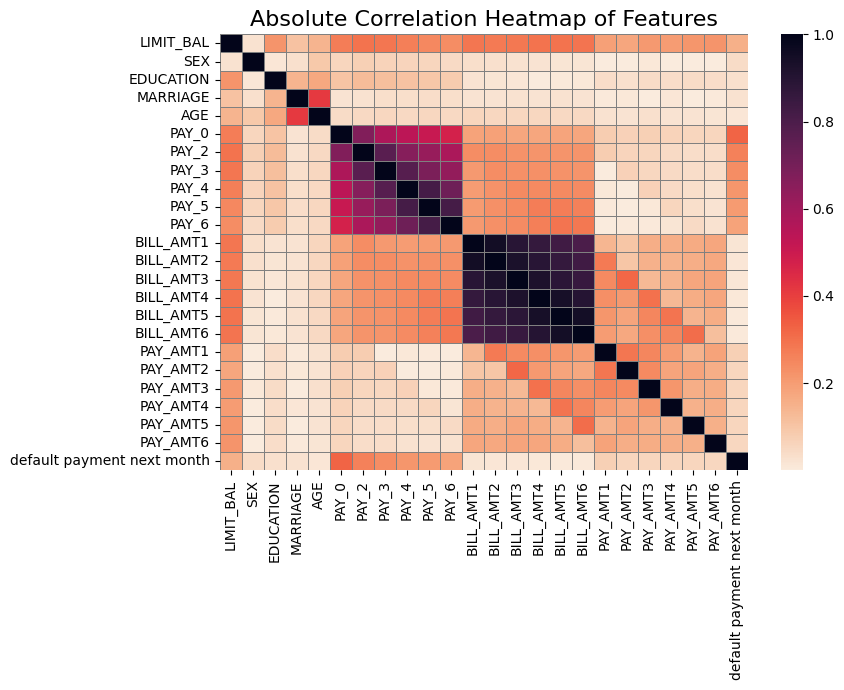

In [ ]:
# Create the heatmap
fig, ax = plt.subplots(figsize=(9, 7))
sns.heatmap(df.corr().abs(), annot=False, cmap='rocket_r', ax=ax, linewidths=0.5, linecolor='gray')

# Optional: Add title and improve layout
ax.set_title("Absolute Correlation Heatmap of Features", fontsize=16)
plt.tight_layout()

# Save the figure
plt.savefig("credit_card_correlation_heatmap.png", dpi=300, bbox_inches='tight')
plt.show()

Pairplot split in two. The first one is for PAY_N and the second one is for PAY_AMT

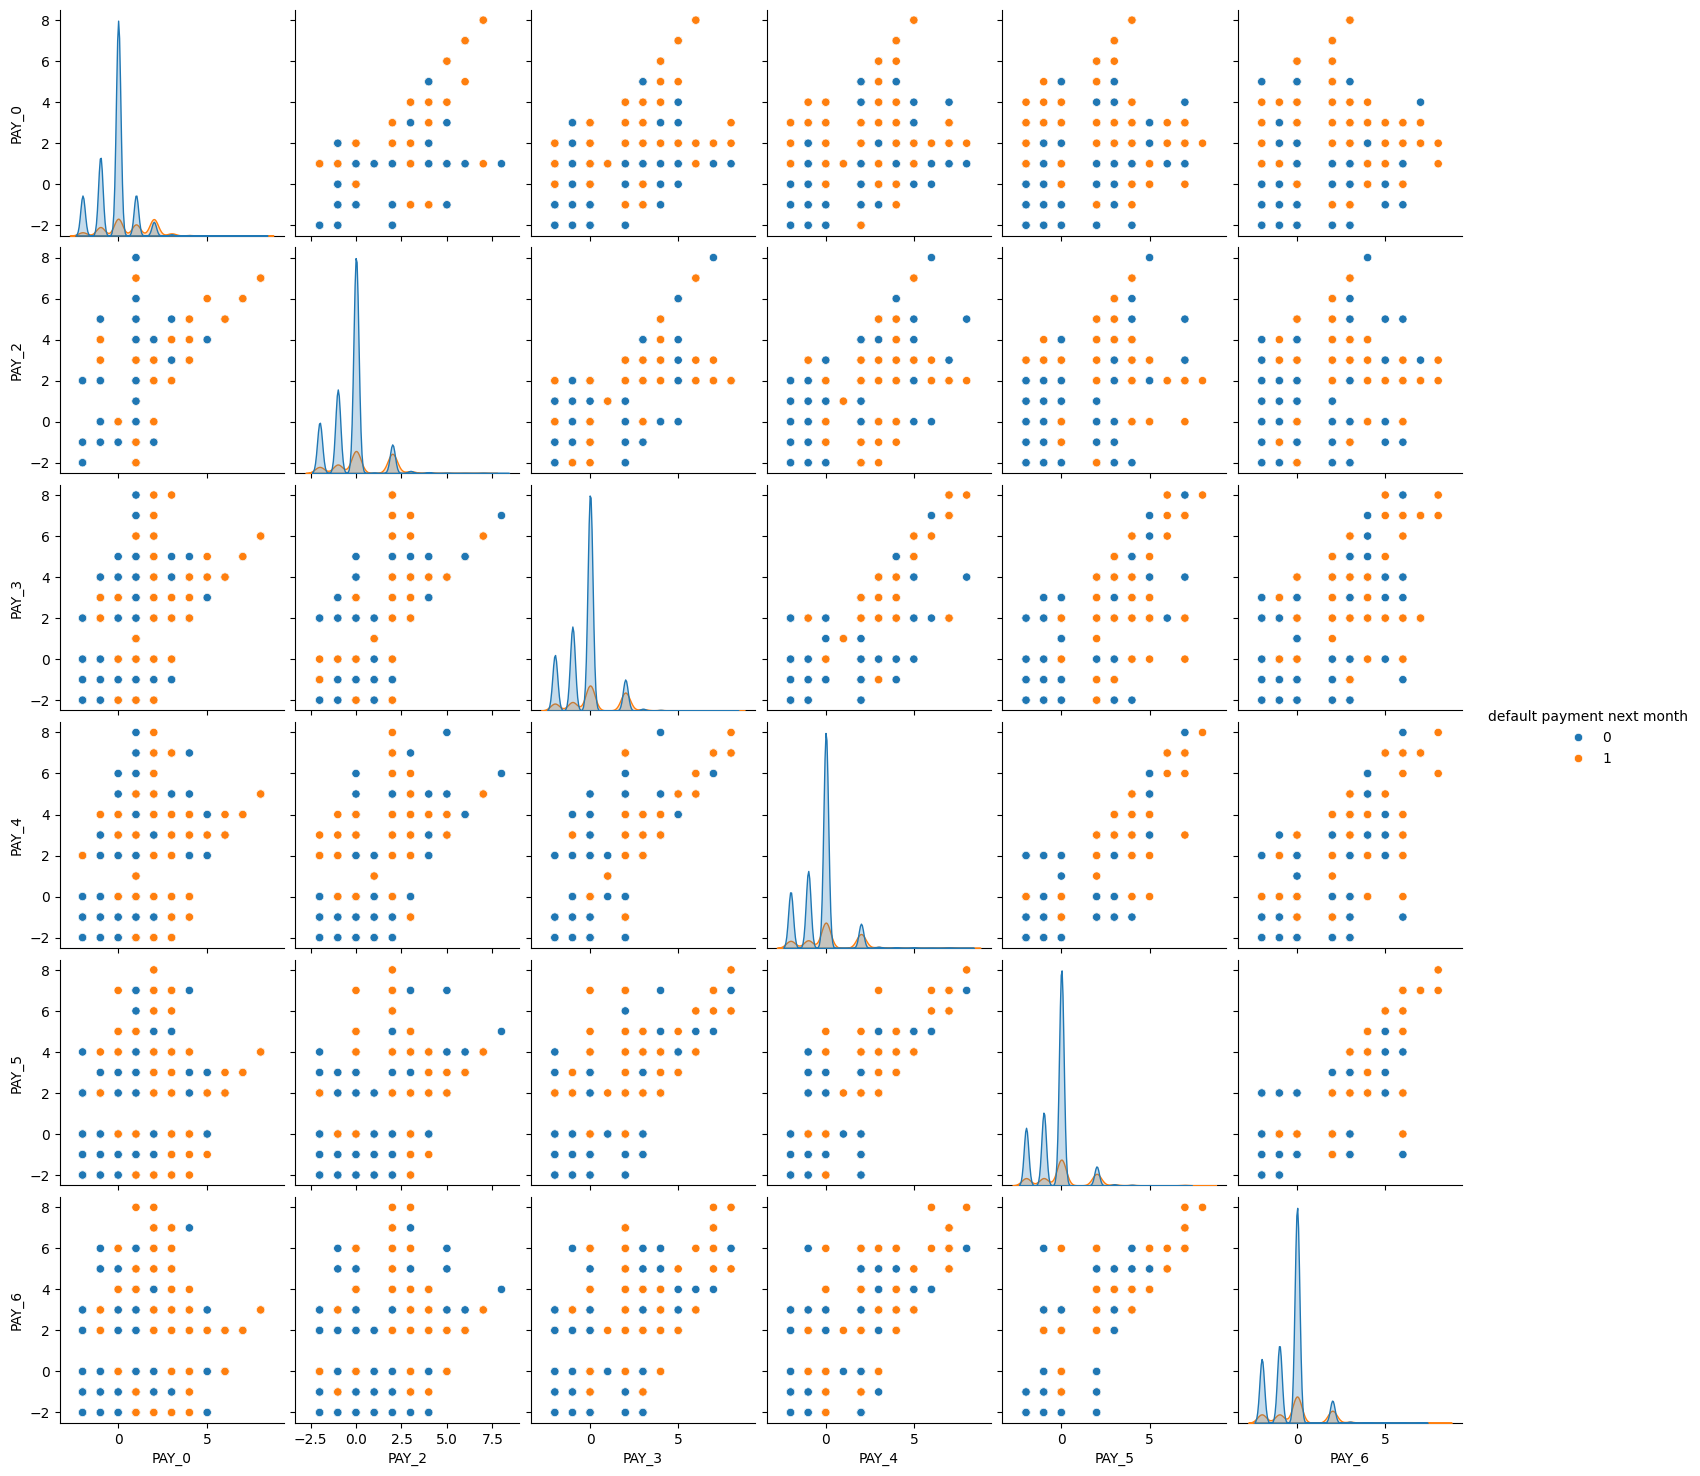

In [ ]:
pairplot_features = ['PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'default payment next month']

# Plot KDE pairplot
plot = sns.pairplot(df[pairplot_features], hue='default payment next month')

# Save figure
plot.fig.savefig("pairplot_kde_default_1.png", dpi=300, bbox_inches='tight')
plt.show()

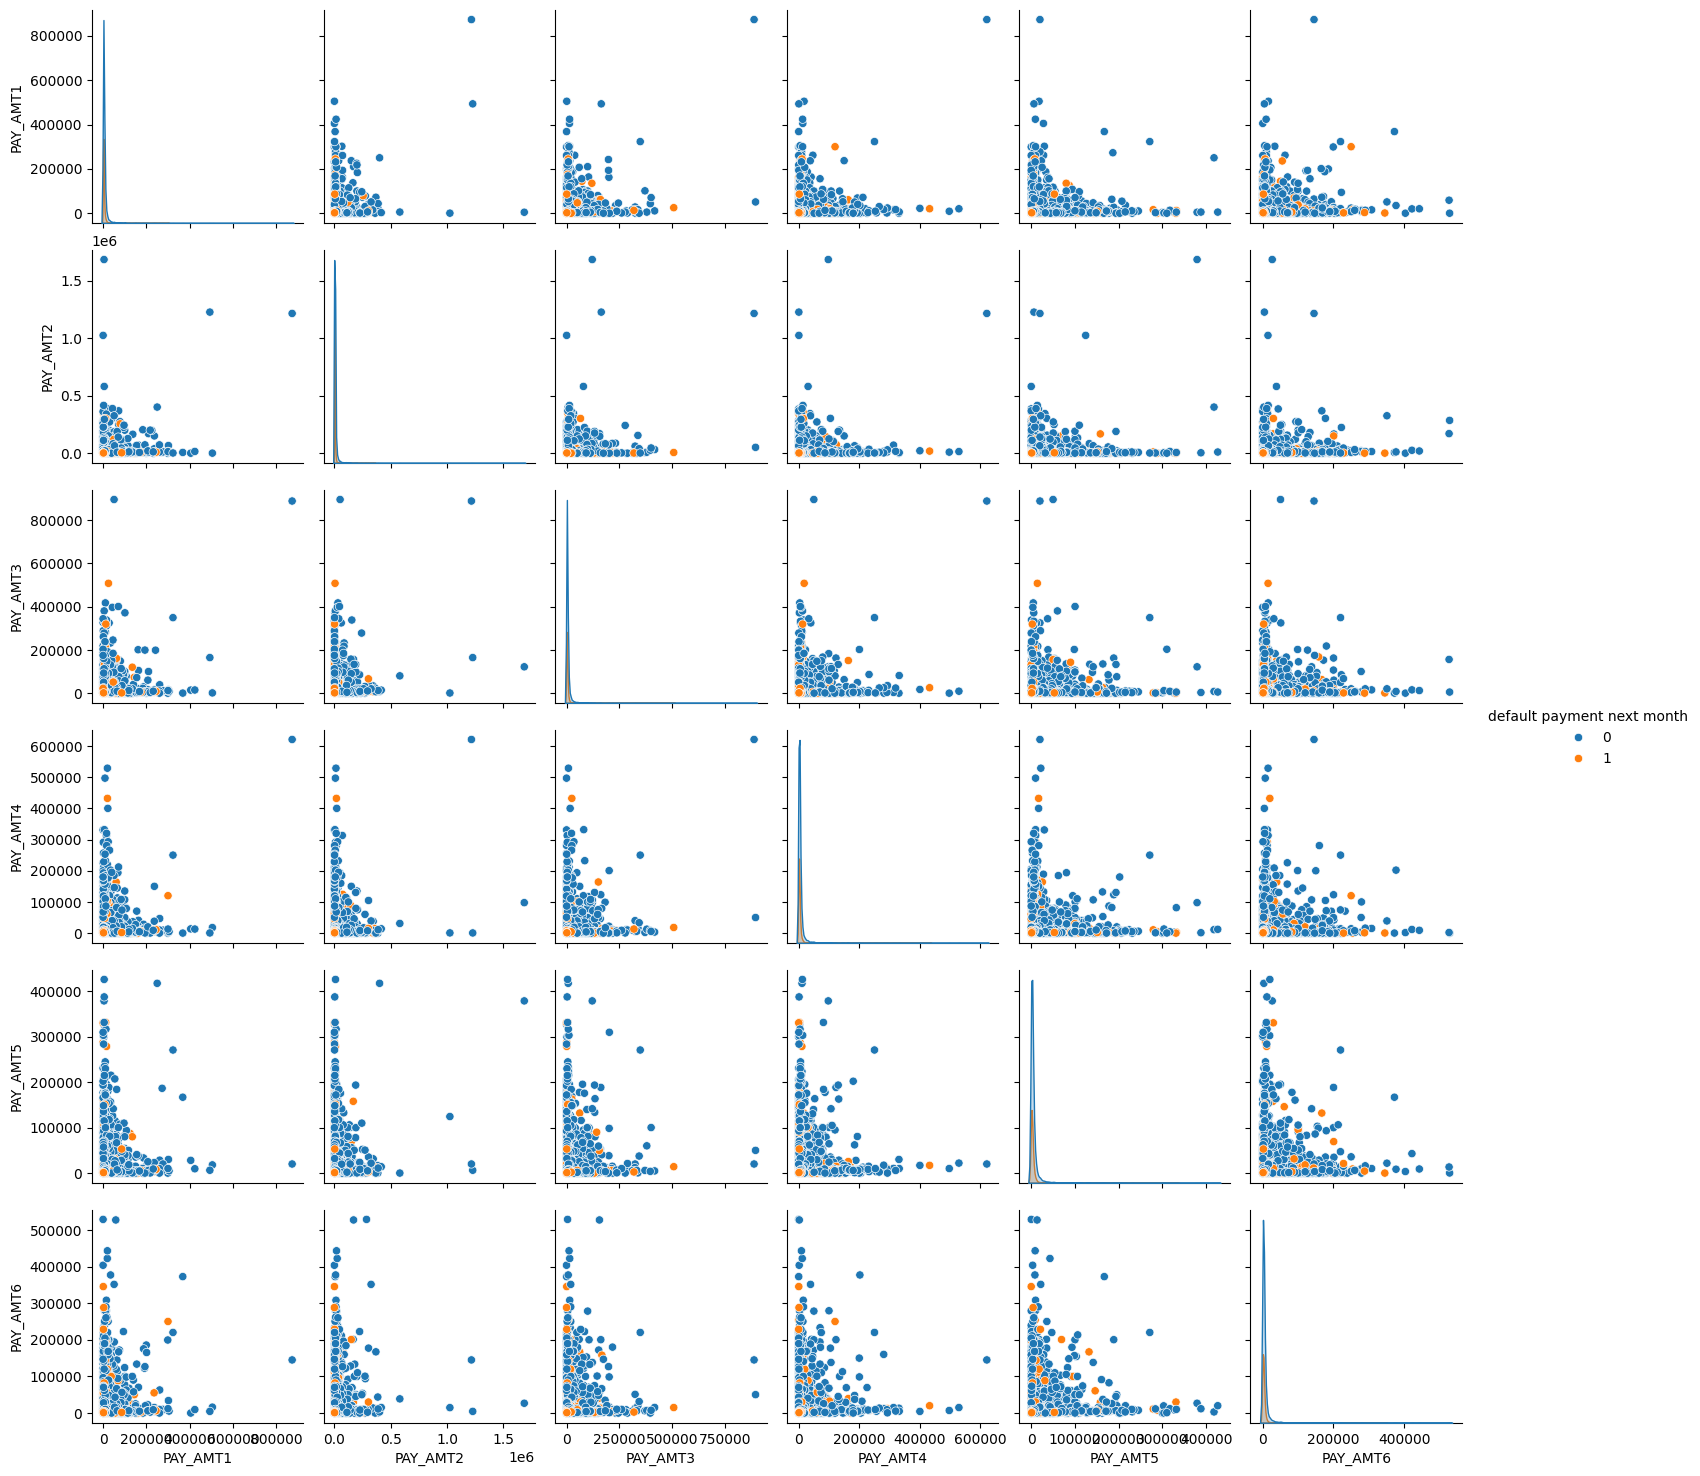

In [ ]:
pairplot_features = ['PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'default payment next month']

# Plot KDE pairplot
plot = sns.pairplot(df[pairplot_features], hue='default payment next month')

# Save figure
plot.fig.savefig("pairplot_kde_default_2.png", dpi=300, bbox_inches='tight')
plt.show()

#Logistic Regression

In [38]:
class LogisticRegression:
    def __init__(self, descent_type=0, optimizer=0, learning_rate=0.01, threshold=0.5, epoch=500, doPrint=True):
        # Hyperparameters
        self.learning_rate = learning_rate
        self.epoch = epoch
        self.threshold = threshold
        self.descent_type = descent_type
        self.output_freq = epoch // 20
        self.weights = None
        self.bias = None
        self.optimizer = optimizer
        self.useOptimizer = (optimizer != 0)
        self.doPrint = doPrint

        # For Momentum Optimizer
        self.v_w_momentum = 0
        self.v_b_momentum = 0

        # For RMSProp
        self.v_w = 0
        self.v_b = 0

        # For Adam Optimizer
        self.m_w = 0
        self.v_w = 0
        self.m_b = 0
        self.v_b = 0

        self.t = 1
        self.beta1 = 0.9
        self.beta2 = 0.999
        self.epsilon = 1e-8

        # For Reproducibility
        np.random.seed(42)

    # Returns a probability between 0 and 1
    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))

    # Cost derived from Bernoulli's Distribution and MLE
    def cost(self, y, y_hat):
        epsilon = 1e-15
        return -np.mean(y * np.log(y_hat + epsilon) + (1 - y) * np.log(1 - y_hat + epsilon))

    # Momentum
    def momentum(self, w_grad, b_grad, beta=0.9):
        self.v_w_momentum = beta * self.v_w_momentum + (1 - beta) * w_grad
        self.v_b_momentum = beta * self.v_b_momentum + (1 - beta) * b_grad

        return self.v_w_momentum, self.v_b_momentum

    # RMSProp
    def rmsprop(self, w_grad, b_grad, beta=0.9):
        self.v_w = beta * self.v_w + (1 - beta) * w_grad**2
        self.v_b = beta * self.v_b + (1 - beta) * b_grad**2

        w_update = w_grad / (np.sqrt(self.v_w) + self.epsilon)
        b_update = b_grad / (np.sqrt(self.v_b) + self.epsilon)

        return w_update, b_update

    # Adam optimizer
    def adam(self, w_grad, b_grad):
        self.m_w = self.beta1 * self.m_w + (1 - self.beta1) * w_grad
        self.m_b = self.beta1 * self.m_b + (1 - self.beta1) * b_grad

        self.v_w = self.beta2 * self.v_w + (1 - self.beta2) * w_grad**2
        self.v_b = self.beta2 * self.v_b + (1 - self.beta2) * b_grad**2

        M_hat_w = self.m_w / ( 1 - self.beta1**self.t)
        M_hat_b = self.m_b / ( 1 - self.beta1**self.t)

        V_hat_w = self.v_w / ( 1 - self.beta2**self.t)
        V_hat_b = self.v_b / ( 1 - self.beta2**self.t)

        self.t += 1

        return M_hat_w, M_hat_b, V_hat_w, V_hat_b

    def apply_optimizer(self, w_grad, b_grad):
        if self.optimizer == 1:
            return self.momentum(w_grad, b_grad)
        elif self.optimizer == 2:
            return self.rmsprop(w_grad, b_grad)
        elif self.optimizer == 3:
            M_hat_w, M_hat_b, V_hat_w, V_hat_b = self.adam(w_grad, b_grad)
            w_update = M_hat_w / (np.sqrt(V_hat_w) + self.epsilon)
            b_update = M_hat_b / (np.sqrt(V_hat_b) + self.epsilon)
            return w_update, b_update
        else:
            return w_grad, b_grad


    # Batch Gradient Descend: Gradient Over the Whole Dataset
    def batch_gradient_descent(self, X, y):
        for i in range(self.epoch):
            y_hat = self.sigmoid(np.dot(X, self.weights) + self.bias)
            cost = self.cost(y, y_hat)

            w_grad = np.dot(X.T, y_hat - y) / X.shape[0]
            b_grad = np.sum(y_hat - y) / X.shape[0]

            if self.useOptimizer:
                w_update, b_update = self.apply_optimizer(w_grad, b_grad)
                self.weights -= self.learning_rate * w_update
                self.bias -= self.learning_rate * b_update
            else:
                self.weights -= self.learning_rate * w_grad
                self.bias -= self.learning_rate * b_grad

            if (i % self.output_freq == 0 or i == self.epoch - 1) and self.doPrint:
                print(f"Iteration {i}, Cost: {cost:.4f}")

    # Stochastic Gradient Descent: Gradient Over a Single Data
    def stochastic_gradient_descent(self, X, y):
        for i in range(self.epoch):
            indices = np.arange(X.shape[0])
            np.random.shuffle(indices)
            X_shuffled = X[indices]
            y_shuffled = y[indices]

            cost_sum = 0

            for j in range(X_shuffled.shape[0]):
                y_hat = self.sigmoid(np.dot(X_shuffled[j], self.weights) + self.bias)
                cost = self.cost(y_shuffled[j], y_hat)
                cost_sum += cost

                w_grad = np.dot(X_shuffled[j].T, y_hat - y_shuffled[j])
                b_grad = y_hat - y_shuffled[j]
                if self.useOptimizer:
                    w_update, b_update = self.apply_optimizer(w_grad, b_grad)
                    self.weights -= self.learning_rate * w_update
                    self.bias -= self.learning_rate * b_update
                else:
                    self.weights -= self.learning_rate * w_grad
                    self.bias -= self.learning_rate * b_grad

            if (i % self.output_freq == 0 or i == self.epoch - 1) and self.doPrint:
                avg_cost = cost_sum/ X_shuffled.shape[0]
                print(f"Iteration {i}, Cost: {avg_cost:.4f}")

    # Mini Batch Gradient Descent: Gradient Over a Subset of Data
    def mini_batch_gradient_descent(self, X, y, batch_size=64):
        for i in range(self.epoch):
            indices = np.arange(X.shape[0])
            np.random.shuffle(indices)
            X_shuffled = X[indices]
            y_shuffled = y[indices]

            for j in range(0, X.shape[0], batch_size):
                X_batch = X_shuffled[j:j+batch_size]
                y_batch = y_shuffled[j:j+batch_size]

                y_hat = self.sigmoid(np.dot(X_batch, self.weights) + self.bias)
                cost = self.cost(y_batch, y_hat)

                w_grad = np.dot(X_batch.T, y_hat - y_batch) / X_batch[0].shape
                b_grad = np.sum(y_hat - y_batch) / X_batch[0].shape
                if self.useOptimizer:
                    w_update, b_update = self.apply_optimizer(w_grad, b_grad)
                    self.weights -= self.learning_rate * w_update
                    self.bias -= self.learning_rate * b_update
                else:
                    self.weights -= self.learning_rate * np.dot(X_batch.T, y_hat - y_batch) / X_batch[0].shape
                    self.bias -= self.learning_rate * np.sum(y_hat - y_batch) / X_batch[0].shape

            if (i % self.output_freq == 0 or i == self.epoch - 1) and self.doPrint:
                print(f"Iteration {i}, Cost: {cost:.4f}")

    # This function guides the user into separate algorithm
    def fit(self, X, y, batch_size=64):
        self.weights = np.random.randn(X.shape[1])
        self.bias = 0

        # Batch Gradient Descent
        if self.descent_type == 0:
            self.batch_gradient_descent(X, y)
        # Stochastic Gradient Descent
        elif self.descent_type == 1:
            self.stochastic_gradient_descent(X, y)
        # Mini Gradient Descent
        elif self.descent_type == 2:
            self.mini_batch_gradient_descent(X, y, batch_size)
        else:
            raise ValueError("Invalid descent type. Choose 0, 1, or 2.")

    # Calculates the Accuracy
    def accuracy(self, X_test, y_test):
        y_prob = self.sigmoid(np.dot(X_test, self.weights) + self.bias)
        y_pred = y_prob >= self.threshold
        accuracy = np.mean(y_pred == y_test)
        return accuracy

    # Gets the prediction
    def get_y_pred(self, X):
        return (self.sigmoid(np.dot(X, self.weights) + self.bias) >= self.threshold).astype(int)

    # Save model parameters for future use
    def save(self):
      if self.descent_type == 0:
          descent_type = 'batch'
      elif self.descent_type == 1:
          descent_type = 'stochastic'
      elif self.descent_type == 2:
          descent_type = 'mini-batch'

      if self.optimizer == 1:
          descent_type += '_momentum'
      elif self.optimizer == 2:
          descent_type += '_rmsprop'
      elif self.optimizer == 3:
          descent_type += '_adam'

      np.save(f'{descent_type}_weights.npy', self.weights)
      np.save(f'{descent_type}_bias.npy', self.bias)

      with open(f'{descent_type}_logistic_model.pkl', 'wb') as f:
          pickle.dump(self, f)

# Train Test Split function using NumPy
def train_test_split(X, y, test_size=0.2, random_state=42):
    np.random.seed(random_state)

    # Shuffle the indices
    indices = np.arange(X.shape[0])
    np.random.shuffle(indices)

    # Compute split index
    test_size = int(len(X) * test_size)

    # Split indices
    test_indices = indices[:test_size]
    train_indices = indices[test_size:]

    # Split data
    X_train, X_test = X[train_indices], X[test_indices]
    y_train, y_test = y[train_indices], y[test_indices]

    return X_train, X_test, y_train, y_test

We will now ready the training data by dropping the label and have a vector of only the labels. We will split the original data into training and validation using NumPy's shuffle function.

In [16]:
X = df.drop(columns=["default payment next month"]).values
y = df["default payment next month"].values

X = (X - np.mean(X, axis=0)) / np.std(X, axis=0)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

###Let's see how the labels are split

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

print(f"Percentage of 1 in Training: {np.sum(y_train == 1) / y_train.size * 100:.3f}")
print(f"Percentage of 1 in Testing:  {np.sum(y_test == 1) / y_test.size * 100:.3f}")
print(f"\nPercentage of 0 in Training: {np.sum(y_train == 0) / y_train.size * 100:.3f}")
print(f"Percentage of 0 in Testing:  {np.sum(y_test == 0) / y_test.size * 100:.3f}")

Percentage of 1 in Training: 22.179
Percentage of 1 in Testing:  21.883

Percentage of 0 in Training: 77.821
Percentage of 0 in Testing:  78.117


The labels are splitted pretty evenly. This should be a good training and test data for our model. It will see both labels equally in training and validation.

descent_type
*   0 = Batch Gradient Descent
*   1 = Stochastic Gradient Descent
*   2 = Mini-Batch Gradient Descent

optimizer
*   0 = No Optimizer
*   1 = Momentum
*   2 = RMSProp
*   3 = Adam

epoch
*   Integer

learning_rate
*   Float

##Batch Gradient Descent

In [41]:
# Train
model = LogisticRegression(descent_type=0, optimizer=3, learning_rate=0.1, epoch=500)
start_time = time.time()
model.fit(X_train, y_train)
end_time = time.time()

b_y_hat = model.get_y_pred(X_test)

# Evaluate
acc = model.accuracy(X_test, y_test)
print(f"\nTest Accuracy: {acc:.4f}")
print(f"Training time: {end_time - start_time:.2f} seconds")

model.save()

Iteration 0, Cost: 1.8938
Iteration 25, Cost: 0.5068
Iteration 50, Cost: 0.4766
Iteration 75, Cost: 0.4676
Iteration 100, Cost: 0.4663
Iteration 125, Cost: 0.4657
Iteration 150, Cost: 0.4654
Iteration 175, Cost: 0.4653
Iteration 200, Cost: 0.4652
Iteration 225, Cost: 0.4651
Iteration 250, Cost: 0.4651
Iteration 275, Cost: 0.4651
Iteration 300, Cost: 0.4651
Iteration 325, Cost: 0.4651
Iteration 350, Cost: 0.4651
Iteration 375, Cost: 0.4651
Iteration 400, Cost: 0.4651
Iteration 425, Cost: 0.4651
Iteration 450, Cost: 0.4651
Iteration 475, Cost: 0.4651
Iteration 499, Cost: 0.4651

Test Accuracy: 0.8098
Training time: 1.84 seconds


##Stochastic Gradient Descent

In [33]:
# Train
model = LogisticRegression(descent_type=1, optimizer=3, learning_rate=0.1, epoch=500)
start_time = time.time()
model.fit(X_train, y_train)
end_time = time.time()

s_y_hat = model.get_y_pred(X_test)

# Evaluate
acc = model.accuracy(X_test, y_test)
print(f"\nTest Accuracy: {acc:.4f}")
print(f"Training time: {end_time - start_time:.2f} seconds")

# model.save()

Iteration 0, Cost: 0.8088
Iteration 25, Cost: 0.8119
Iteration 50, Cost: 0.8147
Iteration 75, Cost: 0.8080
Iteration 100, Cost: 0.8150
Iteration 125, Cost: 0.7984
Iteration 150, Cost: 0.8100
Iteration 175, Cost: 0.8159
Iteration 200, Cost: 0.8125
Iteration 225, Cost: 0.8137
Iteration 250, Cost: 0.8107
Iteration 275, Cost: 0.8108
Iteration 300, Cost: 0.8058
Iteration 325, Cost: 0.8030
Iteration 350, Cost: 0.8092
Iteration 375, Cost: 0.7993
Iteration 400, Cost: 0.8256
Iteration 425, Cost: 0.8137
Iteration 450, Cost: 0.8016
Iteration 475, Cost: 0.8009
Iteration 499, Cost: 0.8076

Test Accuracy: 0.7875
Training time: 672.93 seconds


##Mini-Batch Gradient Descent (Batch Size: 64)

In [21]:
# Train
model = LogisticRegression(descent_type=2, optimizer=3, learning_rate=0.1, epoch=500)
start_time = time.time()
model.fit(X_train, y_train)
end_time = time.time()

mb_y_hat = model.get_y_pred(X_test)

# Evaluate
acc = model.accuracy(X_test, y_test)
print(f"\nTest Accuracy: {acc:.4f}")
print(f"Training time: {end_time - start_time:.2f} seconds")

# model.save()

Iteration 0, Cost: 0.4757
Iteration 25, Cost: 0.4849
Iteration 50, Cost: 0.4166
Iteration 75, Cost: 0.4303
Iteration 100, Cost: 0.3711
Iteration 125, Cost: 0.4516
Iteration 150, Cost: 0.4616
Iteration 175, Cost: 0.5025
Iteration 200, Cost: 0.4185
Iteration 225, Cost: 0.5197
Iteration 250, Cost: 0.3134
Iteration 275, Cost: 0.2866
Iteration 300, Cost: 0.5302
Iteration 325, Cost: 0.3753
Iteration 350, Cost: 0.5928
Iteration 375, Cost: 0.5601
Iteration 400, Cost: 0.3735
Iteration 425, Cost: 0.5279
Iteration 450, Cost: 0.3629
Iteration 475, Cost: 0.6995
Iteration 499, Cost: 0.4861

Test Accuracy: 0.7933
Training time: 18.32 seconds


Try Loading the Saved Model

In [ ]:
with open('batch_adam_logistic_model.pkl', 'rb') as f:
    model = pickle.load(f)

# Evaluate
acc = model.accuracy(X_test, y_test)
print(f"\nTest Accuracy: {acc:.4f}")


Test Accuracy: 0.8098


##Evaluation (Recall, Precision, F1 Score)

In [27]:
def evaluate_model(name, y_true, y_pred):
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    print(f"{name} Results:")
    print(f"  Precision: {precision:.4f}")
    print(f"  Recall:    {recall:.4f}")
    print(f"  F1 Score:  {f1:.4f}")
    print()
    return precision, recall, f1

The following code is comparing the performance of three gradient descent algorithm implemented using Adam optimizer.

In [29]:
# Run evaluation for each model
b_results = evaluate_model("Batch Gradient Descent w Adam", y_test, b_y_hat)
s_results = evaluate_model("Stochastic Gradient Descent w Adam", y_test, s_y_hat)
mb_results = evaluate_model("Mini Batch Gradient Descent w Adam", y_test, mb_y_hat)

Batch Gradient Descent w Adam Results:
  Precision: 0.6920
  Recall:    0.2361
  F1 Score:  0.3521

Stochastic Gradient Descent w Adam Results:
  Precision: 0.5184
  Recall:    0.4067
  F1 Score:  0.4558

Mini Batch Gradient Descent w Adam Results:
  Precision: 0.6698
  Recall:    0.1097
  F1 Score:  0.1885



I will compare the performance of each optimization algorithm with Batch Gradient Descent since Stochastic Gradient Descent takes too long to run in general. Detail analysis is on the PDF document.

In [37]:
# Train
model = LogisticRegression(descent_type=0, optimizer=0, learning_rate=0.1, epoch=500)
start_time = time.time()
model.fit(X_train, y_train)
end_time = time.time()
b_y_hat_0 = model.get_y_pred(X_test)

acc = model.accuracy(X_test, y_test)
print(f"\nTest Accuracy: {acc:.4f}")
print(f"Training time: {end_time - start_time:.2f} seconds\n")

model = LogisticRegression(descent_type=0, optimizer=1, learning_rate=0.1, epoch=500)
start_time = time.time()
model.fit(X_train, y_train)
end_time = time.time()
b_y_hat_1 = model.get_y_pred(X_test)

acc = model.accuracy(X_test, y_test)
print(f"\nTest Accuracy: {acc:.4f}")
print(f"Training time: {end_time - start_time:.2f} seconds\n")

model = LogisticRegression(descent_type=0, optimizer=2, learning_rate=0.1, epoch=500)
start_time = time.time()
model.fit(X_train, y_train)
end_time = time.time()
b_y_hat_2 = model.get_y_pred(X_test)

acc = model.accuracy(X_test, y_test)
print(f"\nTest Accuracy: {acc:.4f}")
print(f"Training time: {end_time - start_time:.2f} seconds\n")

model = LogisticRegression(descent_type=0, optimizer=3, learning_rate=0.1, epoch=500)
start_time = time.time()
model.fit(X_train, y_train)
end_time = time.time()
b_y_hat_3 = model.get_y_pred(X_test)

acc = model.accuracy(X_test, y_test)
print(f"\nTest Accuracy: {acc:.4f}")
print(f"Training time: {end_time - start_time:.2f} seconds\n")

print()
_ = evaluate_model("Batch Gradient Descent No Optimizer", y_test, b_y_hat_0)
_ = evaluate_model("Batch Gradient Descent w Momentum", y_test, b_y_hat_1)
_ = evaluate_model("Batch Gradient Descent w RMSProp", y_test, b_y_hat_2)
_ = evaluate_model("Batch Gradient Descent w Adam", y_test, b_y_hat_3)


Iteration 0, Cost: 1.8938
Iteration 25, Cost: 1.0792
Iteration 50, Cost: 0.7996
Iteration 75, Cost: 0.6824
Iteration 100, Cost: 0.6194
Iteration 125, Cost: 0.5784
Iteration 150, Cost: 0.5496
Iteration 175, Cost: 0.5289
Iteration 200, Cost: 0.5143
Iteration 225, Cost: 0.5044
Iteration 250, Cost: 0.4975
Iteration 275, Cost: 0.4926
Iteration 300, Cost: 0.4889
Iteration 325, Cost: 0.4860
Iteration 350, Cost: 0.4838
Iteration 375, Cost: 0.4819
Iteration 400, Cost: 0.4803
Iteration 425, Cost: 0.4790
Iteration 450, Cost: 0.4778
Iteration 475, Cost: 0.4767
Iteration 499, Cost: 0.4758

Test Accuracy: 0.8053
Training time: 1.68 seconds

Iteration 0, Cost: 1.8938
Iteration 25, Cost: 1.2273
Iteration 50, Cost: 0.8435
Iteration 75, Cost: 0.7013
Iteration 100, Cost: 0.6327
Iteration 125, Cost: 0.5879
Iteration 150, Cost: 0.5561
Iteration 175, Cost: 0.5333
Iteration 200, Cost: 0.5171
Iteration 225, Cost: 0.5060
Iteration 250, Cost: 0.4986
Iteration 275, Cost: 0.4934
Iteration 300, Cost: 0.4895
Iterat

#Hyperparameter Tuning using Grid Search Approach

I will be applying grid search method on Batch Gradient Search only since it is the most efficient method out the other three. I believe it is not necessary to run for hours to see the difference in optimizers performance (by using SGD).

In [42]:
def grid_search_batch_only(X_train, y_train, X_test, y_test):
    results = []

    learning_rates = [0.1, 0.01, 0.001]
    epochs = [100, 500, 1000]
    optimizers = [0, 1, 2, 3]  # 0: None, 1: Momentum, 2: RMSProp, 3: Adam

    for lr, ep, opt in product(learning_rates, epochs, optimizers):
        start_time = time.time()

        model = LogisticRegression(
            descent_type=0,  # Batch GD
            optimizer=opt,
            learning_rate=lr,
            epoch=ep,
            doPrint=False
        )
        model.fit(X_train, y_train)
        y_hat = model.get_y_pred(X_test)
        precision, recall, f1 = evaluate_model("Batch", y_test, y_hat)
        accuracy = model.accuracy(X_test, y_test)
        elapsed = round(time.time() - start_time, 2)

        results.append({
            'optimizer': ['Vanilla', 'Momentum', 'RMSProp', 'Adam'][opt],
            'learning_rate': lr,
            'epochs': ep,
            'precision': precision,
            'recall': recall,
            'f1_score': f1,
            'accuracy': accuracy,
            'training_time_sec': elapsed
        })

        print(f"[Batch | Opt: {['Vanilla', 'Momentum', 'RMSProp', 'Adam'][opt]} | LR: {lr} | Epochs: {ep}]")
        print(f"Test Accuracy: {accuracy:.4f} | F1: {f1:.4f} | Time: {elapsed:.2f}s\n")

    return pd.DataFrame(results).sort_values(by='f1_score', ascending=False)

In [45]:
# Grid Seach
tuning_df_batch = grid_search_batch_only(X_train, y_train, X_test, y_test)

Batch Results:
  Precision: 0.4137
  Recall:    0.3085
  F1 Score:  0.3534

[Batch | Opt: Vanilla | LR: 0.1 | Epochs: 100]
Test Accuracy: 0.7530 | F1: 0.3534 | Time: 0.89s

Batch Results:
  Precision: 0.4036
  Recall:    0.2917
  F1 Score:  0.3386

[Batch | Opt: Momentum | LR: 0.1 | Epochs: 100]
Test Accuracy: 0.7507 | F1: 0.3386 | Time: 0.64s

Batch Results:
  Precision: 0.6544
  Recall:    0.1356
  F1 Score:  0.2246

[Batch | Opt: RMSProp | LR: 0.1 | Epochs: 100]
Test Accuracy: 0.7952 | F1: 0.2246 | Time: 0.40s

Batch Results:
  Precision: 0.6948
  Recall:    0.2323
  F1 Score:  0.3482

[Batch | Opt: Adam | LR: 0.1 | Epochs: 100]
Test Accuracy: 0.8097 | F1: 0.3482 | Time: 0.29s

Batch Results:
  Precision: 0.6600
  Recall:    0.2277
  F1 Score:  0.3386

[Batch | Opt: Vanilla | LR: 0.1 | Epochs: 500]
Test Accuracy: 0.8053 | F1: 0.3386 | Time: 1.43s

Batch Results:
  Precision: 0.6637
  Recall:    0.2300
  F1 Score:  0.3416

[Batch | Opt: Momentum | LR: 0.1 | Epochs: 500]
Test Accuracy

In [46]:
print(tuning_df_batch.head(10))

# Save as CSV file
tuning_df_batch.to_csv("grid_search_results_batch.csv", index=False)

   optimizer  learning_rate  epochs  precision    recall  f1_score  accuracy  \
34   RMSProp          0.001    1000   0.442145  0.357959  0.395623  0.760667   
14   RMSProp          0.010     100   0.435589  0.357959  0.392977  0.758000   
15      Adam          0.010     100   0.364983  0.412795  0.387420  0.714333   
35      Adam          0.001    1000   0.353437  0.415080  0.381786  0.705833   
17  Momentum          0.010     500   0.328068  0.411272  0.364988  0.686833   
30   RMSProp          0.001     500   0.275862  0.536177  0.364295  0.590500   
16   Vanilla          0.010     500   0.327439  0.408987  0.363698  0.686833   
31      Adam          0.001     500   0.267976  0.550647  0.360509  0.572500   
27      Adam          0.001     100   0.245483  0.651942  0.356667  0.485333   
26   RMSProp          0.001     100   0.246225  0.645849  0.356527  0.489833   

    training_time_sec  
34               5.13  
14               0.31  
15               0.28  
35               2.88  

Result from the hyperparameter tuning using grid search method. The table is in F1 Score descending order.

In [47]:
df = pd.read_csv("grid_search_results_batch.csv")

df

,optimizer,learning_rate,epochs,precision,recall,f1_score,accuracy,training_time_sec
0,RMSProp,0.001,1000,0.442145,0.357959,0.395623,0.760667,5.13
1,RMSProp,0.010,100,0.435589,0.357959,0.392977,0.758000,0.31
2,Adam,0.010,100,0.364983,0.412795,0.387420,0.714333,0.28
3,Adam,0.001,1000,0.353437,0.415080,0.381786,0.705833,2.88
4,Momentum,0.010,500,0.328068,0.411272,0.364988,0.686833,3.23
5,RMSProp,0.001,500,0.275862,0.536177,0.364295,0.590500,6.03
6,Vanilla,0.010,500,0.327439,0.408987,0.363698,0.686833,1.39
7,Adam,0.001,500,0.267976,0.550647,0.360509,0.572500,2.67
8,Adam,0.001,100,0.245483,0.651942,0.356667,0.485333,0.28
9,RMSProp,0.001,100,0.246225,0.645849,0.356527,0.489833,0.32


Let's visulalize the performance.

x-axis: Time

y-axis: F1 Score

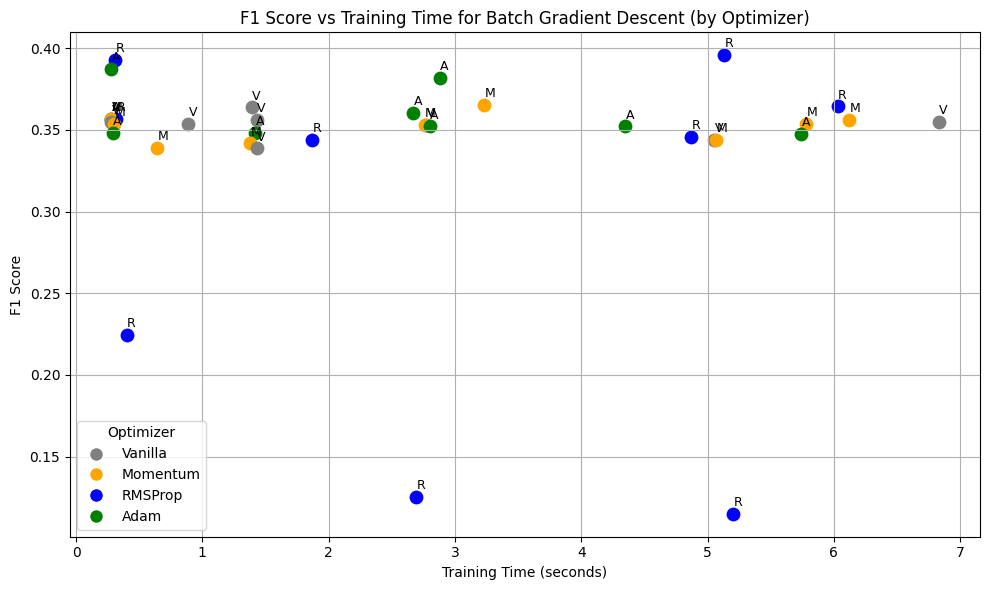

In [50]:
# Load the batch-only grid search results
df = pd.read_csv("grid_search_results_batch.csv")

# Define a color for each optimizer type
optimizer_color_map = {
    "Vanilla": "gray",
    "Momentum": "orange",
    "RMSProp": "blue",
    "Adam": "green"
}
df['color'] = df['optimizer'].map(optimizer_color_map)

# Use optimizer abbreviation as label
optimizer_abbr = {
    "Vanilla": "V",
    "Momentum": "M",
    "RMSProp": "R",
    "Adam": "A"
}
df['label'] = df['optimizer'].map(optimizer_abbr)

# Create the scatter plot
plt.figure(figsize=(10, 6))

for i, row in df.iterrows():
    plt.scatter(row['training_time_sec'], row['f1_score'], color=row['color'], s=80)
    plt.text(row['training_time_sec'] + 0.005, row['f1_score'] + 0.003, row['label'],
             fontsize=9, ha='left', va='bottom')

# Axis and title labels
plt.xlabel("Training Time (seconds)")
plt.ylabel("F1 Score")
plt.title("F1 Score vs Training Time for Batch Gradient Descent (by Optimizer)")

# Legend for optimizers
legend_elements = [
    plt.Line2D([0], [0], marker='o', color='w', label='Vanilla', markerfacecolor='gray', markersize=10),
    plt.Line2D([0], [0], marker='o', color='w', label='Momentum', markerfacecolor='orange', markersize=10),
    plt.Line2D([0], [0], marker='o', color='w', label='RMSProp', markerfacecolor='blue', markersize=10),
    plt.Line2D([0], [0], marker='o', color='w', label='Adam', markerfacecolor='green', markersize=10)
]
plt.legend(handles=legend_elements, title="Optimizer")

plt.grid(True)
plt.tight_layout()
plt.savefig("f1_score_vs_time_batch_only.png")
plt.show()

##**The below is my first version where I misunderstood and implemented only 1 optimizer while I needed to do 3.**

In [ ]:
def grid_search(X_train, y_train, X_test, y_test):
    results = []
    adam_options = [True, False]

    # --- Batch Gradient Descent (0)
    batch_lrs = [0.001, 0.01, 0.1]
    batch_epochs = [250, 500, 1000]

    for lr, ep, use_adam in product(batch_lrs, batch_epochs, adam_options):
        start = time.time()

        model = LogisticRegression(descent_type=0, _adam=use_adam, learning_rate=lr, epoch=ep)
        model.fit(X_train, y_train)
        y_hat = model.get_y_pred(X_test)
        precision, recall, f1 = evaluate_model("Batch", y_test, y_hat)

        duration = time.time() - start

        results.append({
            'descent': 'batch',
            'adam': use_adam,
            'lr': lr,
            'epoch': ep,
            'batch_size': None,
            'precision': precision,
            'recall': recall,
            'f1_score': f1,
            'time_sec': round(duration, 2)
        })

        print(f"Test Accuracy: {model.accuracy(X_test, y_test):.4f} | Time: {duration:.2f}s\n")

    # --- Stochastic Gradient Descent (1)
    sgd_lrs = [0.001, 0.01]
    sgd_epochs = [300, 500]

    for lr, ep, use_adam in product(sgd_lrs, sgd_epochs, adam_options):
        start = time.time()

        model = LogisticRegression(descent_type=1, _adam=use_adam, learning_rate=lr, epoch=ep)
        model.fit(X_train, y_train)
        y_hat = model.get_y_pred(X_test)
        precision, recall, f1 = evaluate_model("Stochastic", y_test, y_hat)

        duration = time.time() - start

        results.append({
            'descent': 'stochastic',
            'adam': use_adam,
            'lr': lr,
            'epoch': ep,
            'batch_size': None,
            'precision': precision,
            'recall': recall,
            'f1_score': f1,
            'time_sec': round(duration, 2)
        })

        print(f"Test Accuracy: {model.accuracy(X_test, y_test):.4f} | Time: {duration:.2f}s\n")

    # --- Mini-Batch Gradient Descent (2)
    minibatch_lrs = [0.001, 0.01, 0.1]
    minibatch_epochs = [100, 500, 1000]
    minibatch_batch_size = 64

    for lr, ep, use_adam in product(minibatch_lrs, minibatch_epochs, adam_options):
        start = time.time()

        model = LogisticRegression(descent_type=2, _adam=use_adam, learning_rate=lr, epoch=ep)
        model.fit(X_train, y_train)
        y_hat = model.get_y_pred(X_test)
        precision, recall, f1 = evaluate_model("Mini Batch", y_test, y_hat)

        duration = time.time() - start

        results.append({
            'descent': 'mini-batch',
            'adam': use_adam,
            'lr': lr,
            'epoch': ep,
            'batch_size': minibatch_batch_size,
            'precision': precision,
            'recall': recall,
            'f1_score': f1,
            'time_sec': round(duration, 2)
        })

        print(f"Test Accuracy: {model.accuracy(X_test, y_test):.4f} | Time: {duration:.2f}s\n")

    return pd.DataFrame(results).sort_values(by='f1_score', ascending=False)


In [ ]:
# Grid Seach
tuning_df = grid_search(X_train, y_train, X_test, y_test)

Iteration 0, Cost: 1.8938
Iteration 12, Cost: 1.8598
Iteration 24, Cost: 1.8267
Iteration 36, Cost: 1.7946
Iteration 48, Cost: 1.7636
Iteration 60, Cost: 1.7335
Iteration 72, Cost: 1.7045
Iteration 84, Cost: 1.6766
Iteration 96, Cost: 1.6495
Iteration 108, Cost: 1.6234
Iteration 120, Cost: 1.5982
Iteration 132, Cost: 1.5738
Iteration 144, Cost: 1.5502
Iteration 156, Cost: 1.5272
Iteration 168, Cost: 1.5050
Iteration 180, Cost: 1.4833
Iteration 192, Cost: 1.4621
Iteration 204, Cost: 1.4414
Iteration 216, Cost: 1.4211
Iteration 228, Cost: 1.4013
Iteration 240, Cost: 1.3818
Iteration 249, Cost: 1.3674
Batch Results:
  Precision: 0.2551
  Recall:    0.6040
  F1 Score:  0.3587

Test Accuracy: 0.5273 | Time: 0.80s

Iteration 0, Cost: 1.8938
Iteration 12, Cost: 1.8871
Iteration 24, Cost: 1.8806
Iteration 36, Cost: 1.8740
Iteration 48, Cost: 1.8675
Iteration 60, Cost: 1.8610
Iteration 72, Cost: 1.8546
Iteration 84, Cost: 1.8482
Iteration 96, Cost: 1.8418
Iteration 108, Cost: 1.8355
Iteration 1

In [ ]:
print(tuning_df.head(10))

# Save as CSV file
tuning_df.to_csv("grid_search_results.csv", index=False)

       descent   adam     lr  epoch  batch_size  precision    recall  \
34  mini-batch   True  0.010    500        64.0   0.665505  0.290937   
43  mini-batch  False  0.100   1000        64.0   0.663653  0.279513   
4        batch   True  0.001   1000         NaN   0.353437  0.415080   
42  mini-batch   True  0.100   1000        64.0   0.556701  0.287890   
41  mini-batch  False  0.100    500        64.0   0.682731  0.258949   
20  stochastic   True  0.001    500         NaN   0.678000  0.258187   
36  mini-batch   True  0.010   1000        64.0   0.676113  0.254379   
21  stochastic  False  0.001    500         NaN   0.689727  0.250571   
24  stochastic   True  0.010    500         NaN   0.635338  0.257426   
9        batch  False  0.010    500         NaN   0.327439  0.408987   

    f1_score  time_sec  
34  0.404875     22.14  
43  0.393355     36.50  
4   0.381786      5.54  
42  0.379518     42.71  
41  0.375483     17.77  
20  0.373966    648.82  
36  0.369673     43.26  
21  0.3

In [ ]:
df = pd.read_csv("grid_search_results.csv")

df

,descent,adam,lr,epoch,batch_size,precision,recall,f1_score,time_sec
0,mini-batch,True,0.010,500,64.0,0.665505,0.290937,0.404875,22.14
1,mini-batch,False,0.100,1000,64.0,0.663653,0.279513,0.393355,36.50
2,batch,True,0.001,1000,NaN,0.353437,0.415080,0.381786,5.54
3,mini-batch,True,0.100,1000,64.0,0.556701,0.287890,0.379518,42.71
4,mini-batch,False,0.100,500,64.0,0.682731,0.258949,0.375483,17.77
5,stochastic,True,0.001,500,NaN,0.678000,0.258187,0.373966,648.82
6,mini-batch,True,0.010,1000,64.0,0.676113,0.254379,0.369673,43.26
7,stochastic,False,0.001,500,NaN,0.689727,0.250571,0.367598,296.78
8,stochastic,True,0.010,500,NaN,0.635338,0.257426,0.366396,646.30
9,batch,False,0.010,500,NaN,0.327439,0.408987,0.363698,1.59


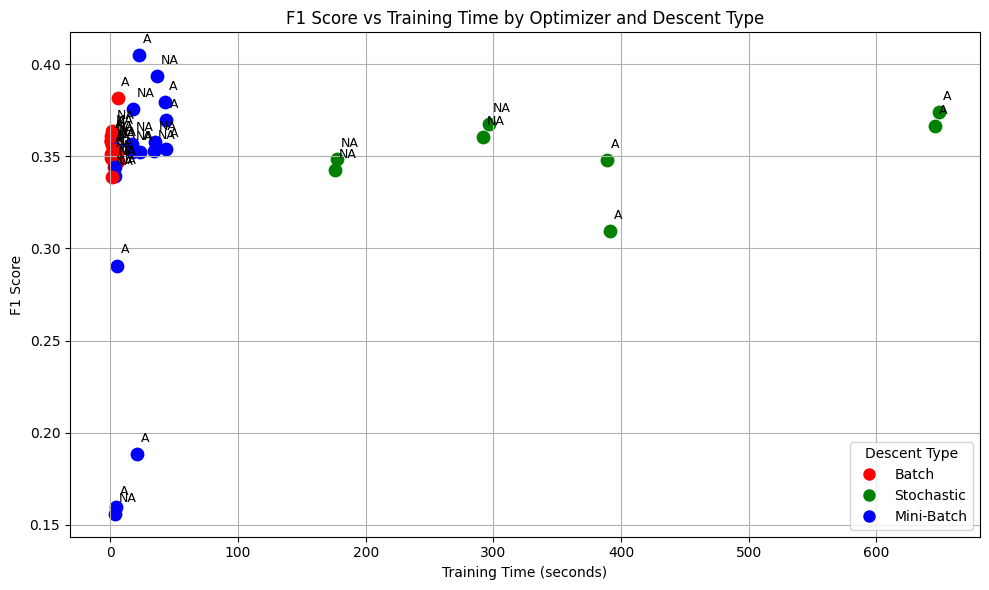

In [ ]:
df = pd.read_csv("grid_search_results.csv")

# Map colors to descent types
color_map = {
    "batch": "red",
    "stochastic": "green",
    "mini-batch": "blue",
}
df['color'] = df['descent'].map(color_map)

# Add label for Adam optimizer
df['label'] = df['adam'].apply(lambda x: "A" if x else "NA")

# Plot
plt.figure(figsize=(10, 6))

for i, row in df.iterrows():
    plt.scatter(row['time_sec'], row['f1_score'], color=row['color'], s=80)
    plt.text(row['time_sec'] + 3, row['f1_score'] + 0.005, row['label'], fontsize=9, ha='left', va='bottom')

# Customize plot
plt.xlabel("Training Time (seconds)")
plt.ylabel("F1 Score")
plt.title("F1 Score vs Training Time by Optimizer and Descent Type")
legend_elements = [
    plt.Line2D([0], [0], marker='o', color='w', label='Batch', markerfacecolor='red', markersize=10),
    plt.Line2D([0], [0], marker='o', color='w', label='Stochastic', markerfacecolor='green', markersize=10),
    plt.Line2D([0], [0], marker='o', color='w', label='Mini-Batch', markerfacecolor='blue', markersize=10)
]
plt.legend(handles=legend_elements, title="Descent Type")
plt.grid(True)
plt.tight_layout()
plt.savefig("f1_score_vs_time.png")
plt.show()
